In [1]:
from model.layers import Conv2D, Flatten, FullyConnected, Pooling, Padding, BatchNorm
from model.model import Model
from model.optimizers import Adam, SGD
from model.activations import ReLU, Softmax, Tanh
from model.losses import cross_entropy, mean_squared_error

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of testing examples: {x_train.shape[0]}")
print(f"Size of each image: {x_train.shape[1:]}")

Number of training examples: 60000
Number of testing examples: 60000
Size of each image: (28, 28)


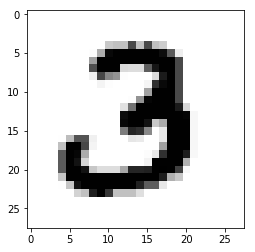

In [5]:
selected_image = x_train[242]

plt.imshow(selected_image, cmap="Greys")

In [6]:
def fix_y(arr):
    """
    Transforms the given array to a onehot encoded vector
    """
    new_arr = np.zeros((arr.shape[0], 10))
    for idx in range(arr.shape[0]):
        new_arr[idx][arr[idx]] = 1
    return new_arr

y_train = fix_y(y_train).astype("float32")
y_test = fix_y(y_test).astype("float32")

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

In [39]:
model = Model([
    Padding(2, mode="zero"),
    Pooling((3, 3), 1, mode='max'),
    Conv2D((6, 6), step=2, filters=8),
    Tanh(),
    #BatchNorm(),
    #Conv2D((1, 1), step=1, filters=32),
    Padding(2, mode="zero"),
    Pooling((3, 3), 1, mode='max'),
    Conv2D((6, 6), step=1, filters=4),
    Tanh(),
    #BatchNorm(),
    Flatten(),
    FullyConnected(10),
    Softmax()
])

In [40]:
optimizer = Adam(0.02)

In [41]:
# run the model on some data to create weights
model(x_train[:3])

optimizer.register_variables(model)

In [42]:
model.calculate_size()

5462

In [43]:
def split_data_to_batches(X, Y, batch_size):
    batches = X.shape[0] // batch_size
    for batch_idx in range(batches):
        start = batch_idx*batch_size
        end = (batch_idx+1)*batch_size
        yield X[start:end], Y[start:end]

In [44]:
optimizer.register_variables(model)

In [45]:
EPOCHS = 13
losses = []

for epoch in range(1, EPOCHS+1):
    epoch_loss = []
    for x,y in split_data_to_batches(x_train, y_train, x_train.shape[0]):
        preds = model(x)
        loss = cross_entropy(y, preds)
        model.backward(y, preds, optimizer)
        epoch_loss.append(loss)
    print(f"Epoch {epoch} finished!\tLoss: {np.mean(epoch_loss):.5f}")
    losses.extend(epoch_loss)

Loss: 2.30262
Epoch 1 finished!	Loss: 2.30262
Loss: 2.32134
Epoch 2 finished!	Loss: 2.32134
Loss: 2.01458
Epoch 3 finished!	Loss: 2.01458
Loss: 1.57227
Epoch 4 finished!	Loss: 1.57227
Loss: 1.69285
Epoch 5 finished!	Loss: 1.69285
Loss: 1.33062
Epoch 6 finished!	Loss: 1.33062
Loss: 1.80633
Epoch 7 finished!	Loss: 1.80633
Loss: 1.03065
Epoch 8 finished!	Loss: 1.03065
Loss: 0.79438
Epoch 9 finished!	Loss: 0.79438
Loss: 0.99953
Epoch 10 finished!	Loss: 0.99953
Loss: 0.82013
Epoch 11 finished!	Loss: 0.82013
Loss: 0.75745
Epoch 12 finished!	Loss: 0.75745
Loss: 0.66667
Epoch 13 finished!	Loss: 0.66667


In [46]:
preds = model(x_test)
preds_am = np.argmax(preds, axis=1)
real = y_test
real_am = np.argmax(real, axis=1)

print(f"Test accuracy: {sum(preds_am == real_am)/x_test.shape[0] * 100:.2f}%")

Test accuracy: 80.14%


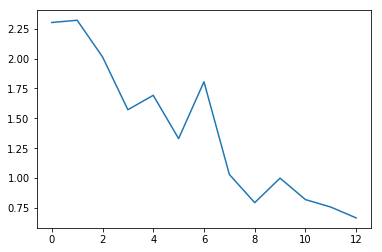

In [47]:
plt.plot(losses)
plt.show()